# Explore the IRAF solution

In [1]:
import os
import numpy as np
from importlib.resources import files

from matplotlib import pyplot as plt

from astropy.table import Table
from astropy.io import fits
from astropy import units

from pypeit.core.wavecal import templates
from pypeit.core.fitting import robust_fit
from pypeit.core import wave as core_wave 

import readmultispec

from IPython import embed

# Load up

In [2]:
wrs_file = 'IRAF/THAR20240125.wrsfbo_1.fits'
wrs_hdu = fits.open(wrs_file)
wrs_hdu.info()

Filename: IRAF/THAR20240125.wrsfbo_1.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     431   (4096, 103)   float32   


# Multispec

In [3]:
multi = readmultispec.readmultispec(wrs_file)
multi['wavelen'].shape

Dispersion is order-%d Chebyshev polynomial 5
Correcting for redshift: z=%f 0.0


(103, 4096)

In [5]:
wave, flux = multi['wavelen'], multi['flux']
wave.shape

(103, 4096)

# Plot a few

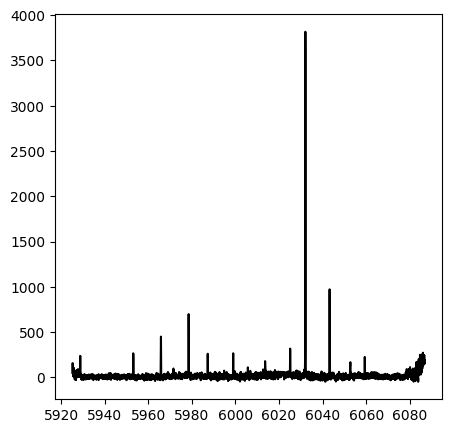

In [24]:
idx = 38

fig = plt.figure(figsize=(5,5))
ax= plt.gca()

ax.plot(multi['wavelen'][idx], multi['flux'][idx], 'k-')
#ax.plot(np.flip(multi['flux'][idx]), 'k-')
#ax.plot(np.flip(multi['flux'][idx]), 'k-')
#ax.set_ylim(0., 500)
#ax.set_xlim(1500., 3000)
#
plt.show()

# idx = 20 is Order 77

In [25]:
order_vec = (77-20) + np.arange(wave.shape[0]) 
order_vec[20], order_vec[38]

(77, 95)

# Header